In [1]:
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding
from sklearn.decomposition import PCA
import numpy as np
import random
import matplotlib
from matplotlib.pyplot import *

In [2]:
# Load MNIST dataset
mnist = fetch_openml("mnist_784")
X, y = mnist.data / 255.0, mnist.target

In [3]:
# Create subset and reduce to first 50 dimensions
indices = np.arange(X.shape[0])
#random.shuffle(indices)
n_train_samples = 10000
X_pca = PCA(n_components=50).fit_transform(X)
X_train = X_pca[indices[:n_train_samples]]
y_train = y[indices[:n_train_samples]]
y_train = np.asarray(y_train).astype(np.float)

In [104]:
np.unique(y_train, return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([1001, 1127,  991, 1032,  980,  863, 1014, 1070,  944,  978]))

In [184]:
# Plotting functions
matplotlib.rc('font', **{'family' : 'sans-serif',
                         'weight' : 'bold',
                         'size'   : 18})
matplotlib.rc('text', **{'usetex' : False})

def plot_mnist_tsne(X, y, X_embedded, name, min_dist=10.0):
    fig = figure(figsize=(13, 13))
    ax = axes(frameon=False)
    #title("\\textbf{MNIST dataset} -- Two-dimensional "
    #      "embedding of 70,000 handwritten digits with %s" % name)
    setp(ax, xticks=(), yticks=())
    subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1],
            marker="x", c=y_train, cmap="Spectral", s=14, alpha=1)  #Spectral/jet
    #ax.legend(*scatter.legend_elements(), prop={'size': 18}) #loc="upper left"

    if min_dist is not None:
        from matplotlib import offsetbox
        shown_images = np.array([[15., 15.]])
        indices = np.arange(X_embedded.shape[0])
        random.shuffle(indices)
                
        for i in indices[:5000]:
            dist = np.sum((X_embedded[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist:
                continue
            shown_images = np.r_[shown_images, [X_embedded[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X[i].reshape(28, 28),
                                      cmap=cm.gray_r), X_embedded[i])
            ax.add_artist(imagebox)
    
    #fig.savefig('mnist_tsne_3.png')
    
def plot_mnist_isomap(X, y, X_embedded, name, min_dist=10.0):
    fig = figure(figsize=(13, 13))
    ax = axes(frameon=False)
    #title("\\textbf{MNIST dataset} -- Two-dimensional "
    #      "embedding of 70,000 handwritten digits with %s" % name)
    setp(ax, xticks=(), yticks=())
    subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1],
            marker="x", c=y_train, cmap="Spectral", s=14)  #Spectral/jet
    #ax.legend(*scatter.legend_elements(), prop={'size': 18}) #loc="upper left"

    if min_dist is not None:
        from matplotlib import offsetbox
        shown_images = np.array([[15., 15.]])
        indices = np.arange(X_embedded.shape[0])
        random.shuffle(indices)
                
        for i in indices[:5000]:
            dist = np.sum((X_embedded[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist:
                continue
            shown_images = np.r_[shown_images, [X_embedded[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X[i].reshape(28, 28),
                                      cmap=cm.gray_r), X_embedded[i])
            ax.add_artist(imagebox)
    
    fig.savefig('mnist_isomap.png')
    
def plot_mnist_pca(X, y, X_embedded, name, min_dist=10.0):
    fig = figure(figsize=(13, 13))
    ax = axes(frameon=False)
    #title("\\textbf{MNIST dataset} -- Two-dimensional "
    #      "embedding of 70,000 handwritten digits with %s" % name)
    setp(ax, xticks=(), yticks=())
    subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1],
            marker="x", c=y_train, cmap="Spectral", s=14)  #Spectral/jet
    #ax.legend(*scatter.legend_elements(), prop={'size': 18}) #loc="upper left"

    if min_dist is not None:
        from matplotlib import offsetbox
        shown_images = np.array([[15., 15.]])
        indices = np.arange(X_embedded.shape[0])
        random.shuffle(indices)
                
        for i in indices[:5000]:
            dist = np.sum((X_embedded[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist:
                continue
            shown_images = np.r_[shown_images, [X_embedded[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X[i].reshape(28, 28),
                                      cmap=cm.gray_r), X_embedded[i])
            ax.add_artist(imagebox)
    
    fig.savefig('mnist_pca.png')

def plot_mnist_umap(X, y, X_embedded, name, min_dist=10.0):
    fig = figure(figsize=(13, 13))
    ax = axes(frameon=False)
    #title("\\textbf{MNIST dataset} -- Two-dimensional "
    #      "embedding of 70,000 handwritten digits with %s" % name)
    setp(ax, xticks=(), yticks=())
    subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1],
            marker="x", c=y_train, cmap="Spectral", s=14)  #Spectral/jet
    #ax.legend(*scatter.legend_elements(), prop={'size': 18}) #loc="upper left"

    if min_dist is not None:
        from matplotlib import offsetbox
        shown_images = np.array([[15., 15.]])
        indices = np.arange(X_embedded.shape[0])
        random.shuffle(indices)
                
        for i in indices[:5000]:
            dist = np.sum((X_embedded[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist:
                continue
            shown_images = np.r_[shown_images, [X_embedded[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X[i].reshape(28, 28),
                                      cmap=cm.gray_r), X_embedded[i])
            ax.add_artist(imagebox)
    
    fig.savefig('mnist_umap.png')

In [131]:
X_train_embedded = TSNE(n_components=2, perplexity=50, verbose=2).fit_transform(X_train)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.143s...
[t-SNE] Computed neighbors for 10000 samples in 7.340s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.931441
[t-SNE] Computed conditional probabilities in 0.598s
[t-SNE] Iteration 50: error = 91.5729980, gradient norm = 0.0008508 (50 iterations in 1.546s)
[t-SNE] I

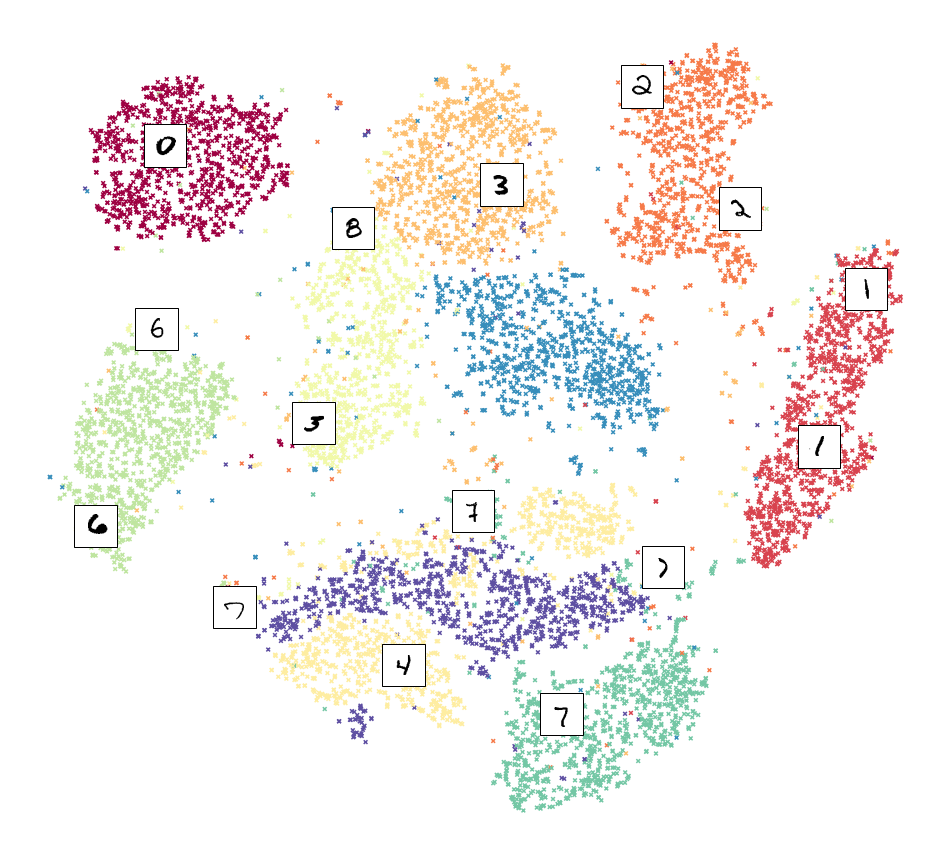

In [185]:
plot_mnist_tsne(X[indices[:n_train_samples]], y_train, X_train_embedded,
           "t-SNE", min_dist=600.0)

In [119]:
X_train_embedded_iso = Isomap(n_components=2, n_neighbors=10).fit_transform(X_train)

TypeError: __init__() got an unexpected keyword argument 'verbose'

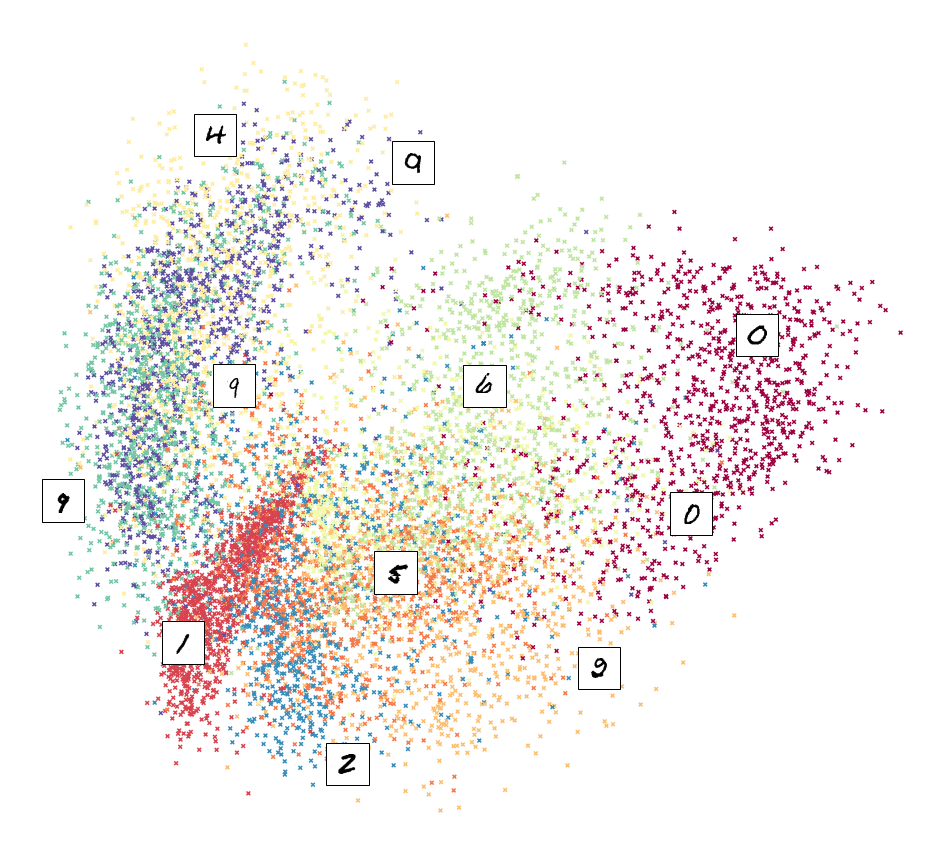

In [183]:
plot_mnist_isomap(X[indices[:n_train_samples]], y_train, X_train_embedded_iso,
           "Isomap", min_dist=80.0)

In [118]:
X_train_embedded_pca = PCA(n_components=2).fit_transform(X_train)

TypeError: __init__() got an unexpected keyword argument 'verbose'

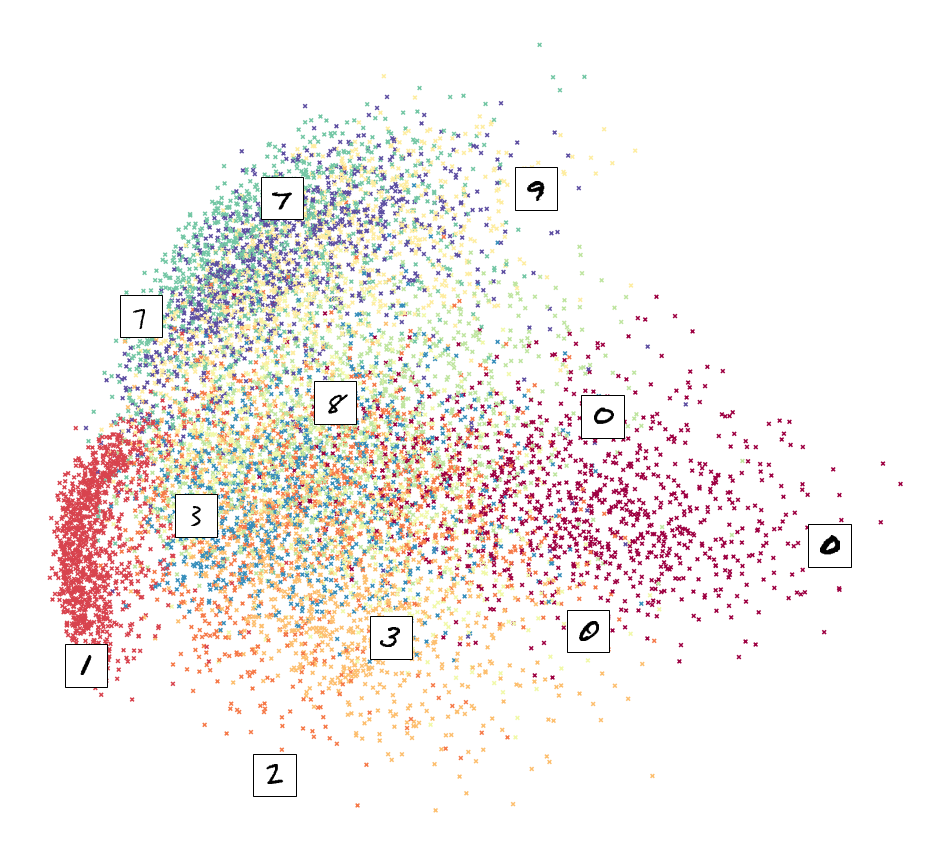

In [179]:
plot_mnist_pca(X[indices[:n_train_samples]], y_train, X_train_embedded_pca,
           "PCA", min_dist=7.0)

In [5]:
import umap

X_train_embedded_umap = umap.UMAP().fit_transform(X_train)

/home/oisin/miniconda3/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../miniconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/oisin/miniconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../miniconda3/lib/python3.7/site-packages/umap/utils.py", line 409:

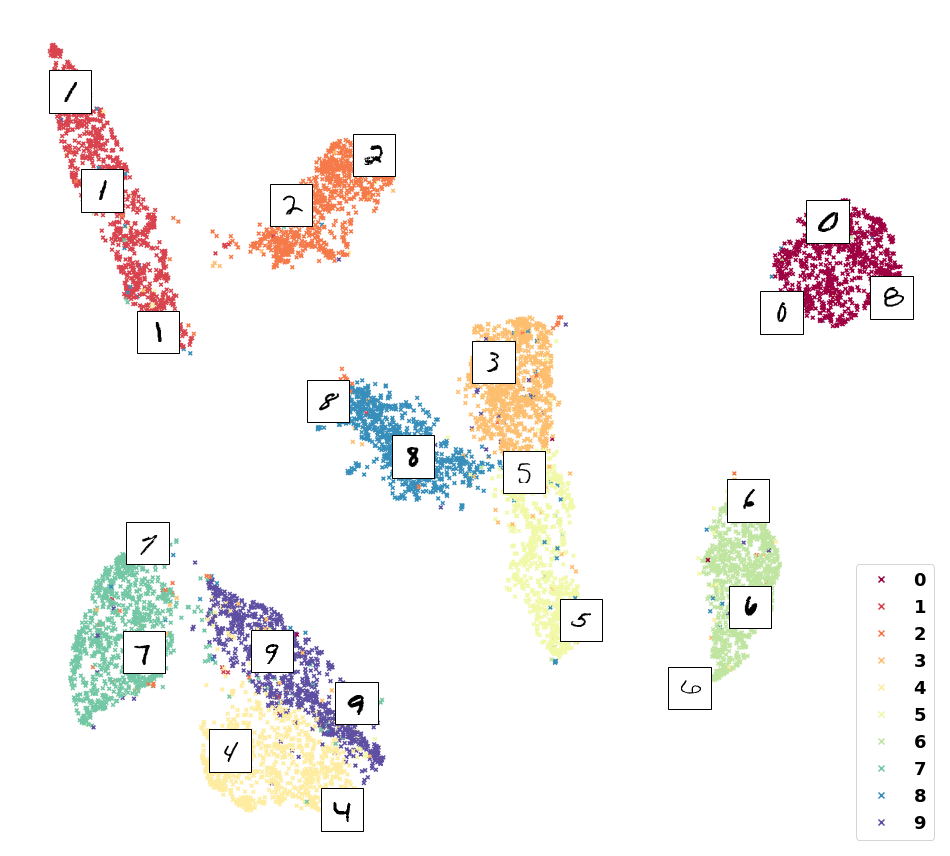

In [8]:
plot_mnist(X[indices[:n_train_samples]], y_train, X_train_embedded_umap,
           "Isomap", min_dist=4.0)

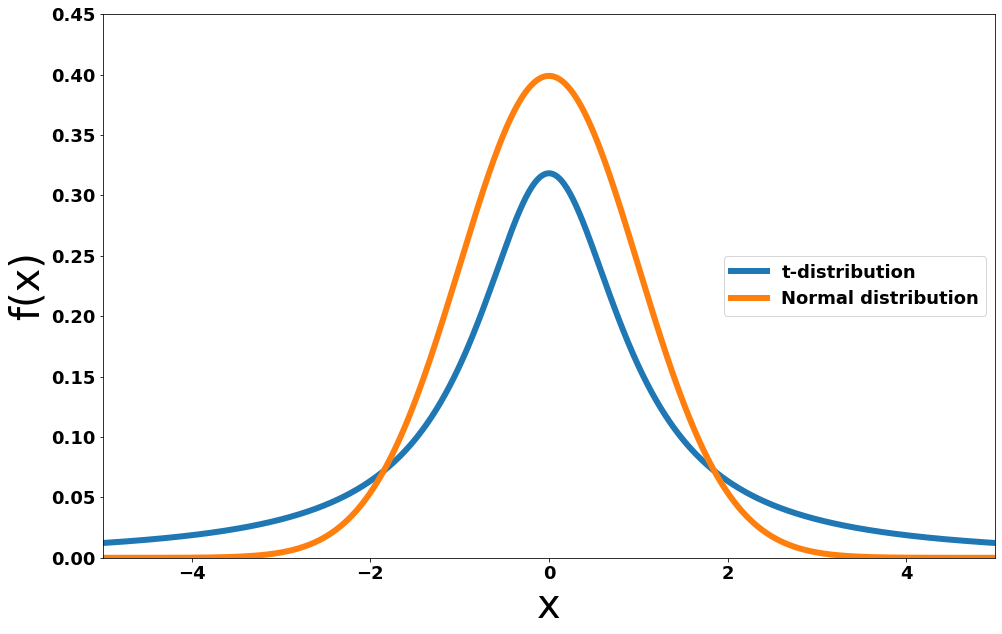

In [252]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np


x_min = -5.0
x_max = 5.0

mean = 0.0 
std = 1.0

df=1

x = np.linspace(x_min, x_max, 1000)

y_norm = scipy.stats.norm.pdf(x,mean,std)

y_t = scipy.stats.t.pdf(x,df)

fig = plt.figure(figsize=(16,10))

plt.plot(x,y_t, label='t-distribution', linewidth=6)
plt.plot(x,y_norm, label= 'Normal distribution', linewidth=6)

plt.rcParams.update({'font.size': 18})
plt.rc('axes', titlesize=50, labelsize=40)

plt.grid(b=False)

plt.xlim(x_min,x_max)
plt.ylim(0,0.45)

#plt.axis.YAxis.remove

plt.legend(loc='center right')
#plt.axis('off')
#plt.y_axis.set_visible(False)

#plt.title('How to plot a normal distribution in python with matplotlib',fontsize=10)

plt.xlabel('x')
plt.ylabel('f(x)')

plt.savefig("distributions.png")
plt.show()